In [1]:
# Full library list and version numbers

print('This notebook was prepared using:')

import sys
print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

import seaborn as sns
print('seaborn version %s' % sns.__version__)

import matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
print('matplotlib version %s' % matplotlib.__version__)

import scipy
from scipy import stats
print('scipy version %s' % scipy.__version__)

import pickle
print('pickle version %s' % pickle.format_version)

import importlib

sys.path.append('./src')

import mplot as mp  # See mplot.py in the current directory

import lolipop_helper
import figures as FIG
import PALTEanalysis
import tobramycin_analysis

import MPL as MPL
import analyze_and_plot as AP
import reconstruct_clades as RC
import infer_fitness as IF
import print_info as PI
import LTEE
import LTEE_helper as LH
import simulation_helper as SH

# GitHub directories
DATA_DIR = './data'
SIMULATION_DIR = './data/simulation'
CLUSTERIZATION_OUTPUT_DIR = './data/clusterization_output'
RECONSTRUCTION_OUTPUT_DIR = './data/reconstruction_output'
LOLIPOP_JOBS_DIR = './data/lolipop/jobs'
LOLIPOP_INPUT_DIR = './data/lolipop/input'
LOLIPOP_OUTPUT_DIR = './data/lolipop/output'
LOLIPOP_PARSED_OUTPUT_DIR = './data/lolipop/parsed_output'
JOB_DIR = './jobs'
FIG_DIR = './figures'

# METHODS = FIG.METHODS

This notebook was prepared using:
python version 3.6.10 |Anaconda, Inc.| (default, Mar 25 2020, 18:53:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.19.1
seaborn version 0.11.0
matplotlib version 3.3.2
scipy version 1.5.2
pickle version 4.0


In [2]:
def resetPlottingParams():
    PARAMS = {'text.usetex': False, 'mathtext.fontset': 'stixsans', 'mathtext.default': 'regular', 'pdf.fonttype': 42, 'ps.fonttype': 42}
    plt.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams.update(PARAMS)

In [3]:
resetPlottingParams()

In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [46]:
def reload():
    importlib.reload(AP)
    importlib.reload(RC)
    importlib.reload(IF)
    importlib.reload(LH)
    importlib.reload(PI)
    importlib.reload(lolipop_helper)
    importlib.reload(FIG)
    importlib.reload(PALTEanalysis)
    importlib.reload(tobramycin_analysis)
    importlib.reload(mp)
    importlib.reload(SH)
reload()

# Trajectories

In [6]:
TRAJ_MARGINPROPS = {
    'left': 0.07,
    'right': 0.98,
    'top': 0.98,
    'bottom': 0.1,
}

def plotTraj(traj, times, save_file=None, title=None, figsize=None):
    if figsize is None:
        h = AP.SINGLE_COLUMN / 2
        w = h * 2
        figsize = (w, h)
    T, L = traj.shape
    AP.plotTraj(traj, times=times, colors=['grey'] * L, alpha=0.6, figsize=figsize, linewidth=AP.SIZELINE,
        fontsize=AP.SIZELABEL, title=title, marginprops=TRAJ_MARGINPROPS,
        save_file=save_file)

Good examples:
- 4, 2 periods, 2nd period is simple (only 1 clade)
- 6, 2 periods, 2nd period has 2 clades. 
- 23, 38, 39, 1st period is boring. 

In [9]:
for n in range(40):
    rec = SH.load_reconstruction_for_a_simulation(params, n)
    if len(rec.periods) == 2:
        print(f"""n={n}, numPeriods={len(rec.periods)}, numAlleles={rec.L}, numClades={[period.numClades for period in rec.periods]},              periodLengths={[boundaries[1] - boundaries[0] for boundaries in rec.periodBoundaries]}""")

n=1, numPeriods=2, numAlleles=9, numClades=[2, 2],              periodLengths=[893, 109]
n=4, numPeriods=2, numAlleles=10, numClades=[3, 3],              periodLengths=[484, 518]
n=6, numPeriods=2, numAlleles=10, numClades=[2, 2],              periodLengths=[706, 296]
n=9, numPeriods=2, numAlleles=10, numClades=[2, 2],              periodLengths=[441, 561]
n=10, numPeriods=2, numAlleles=14, numClades=[4, 2],              periodLengths=[702, 300]
n=13, numPeriods=2, numAlleles=3, numClades=[1, 2],              periodLengths=[475, 527]
n=14, numPeriods=2, numAlleles=9, numClades=[1, 2],              periodLengths=[445, 557]
n=16, numPeriods=2, numAlleles=6, numClades=[2, 1],              periodLengths=[378, 624]
n=18, numPeriods=2, numAlleles=5, numClades=[2, 1],              periodLengths=[632, 370]
n=19, numPeriods=2, numAlleles=6, numClades=[2, 1],              periodLengths=[178, 824]
n=20, numPeriods=2, numAlleles=7, numClades=[2, 2],              periodLengths=[561, 441]
n=23, numP

In [8]:
%%time
reload()
params = SH.Params()  # Default parameters for simulation
# Load the first simulation, and get reconstruction result
simulation = SH.load_simulation(params, 6)

CPU times: user 40.5 ms, sys: 5.51 ms, total: 46 ms
Wall time: 50.3 ms


cladeFixedTimes = [705]
period boundaries:  [(0, 706), (705, 1001)]
ancestors:  [0, 1, 3]
refined period boundaries:  [(0, 508), (508, 1001)]


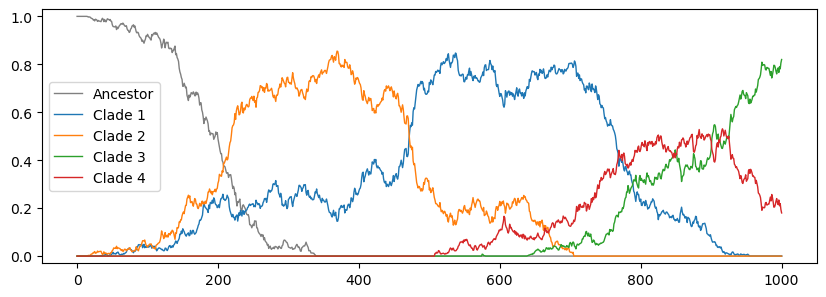

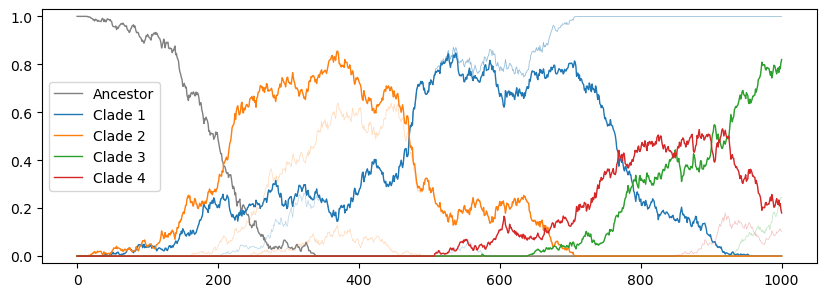

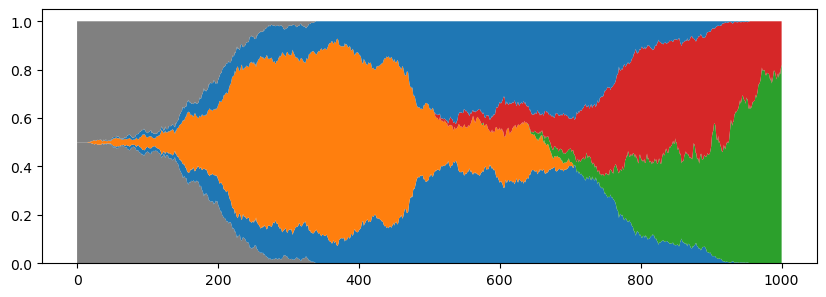

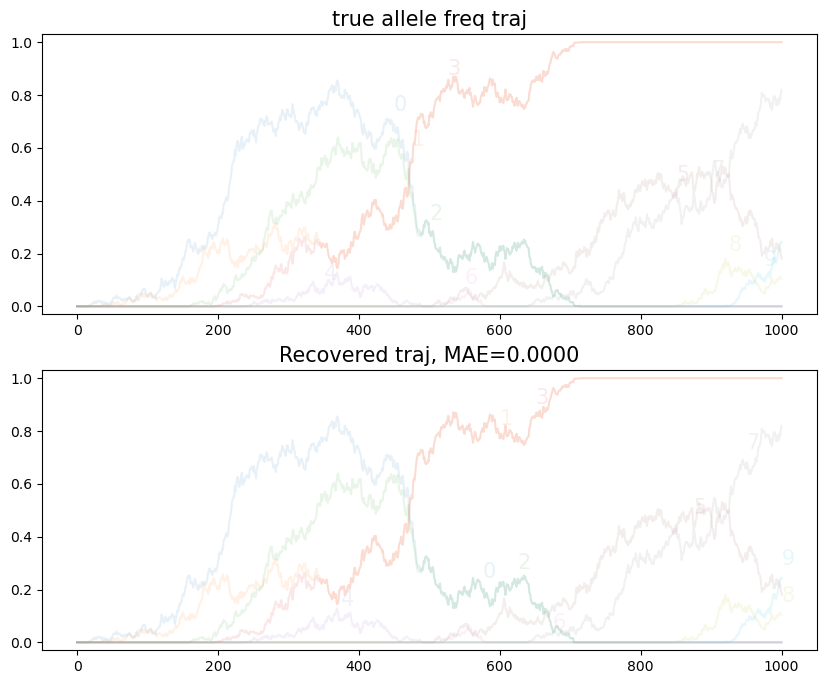

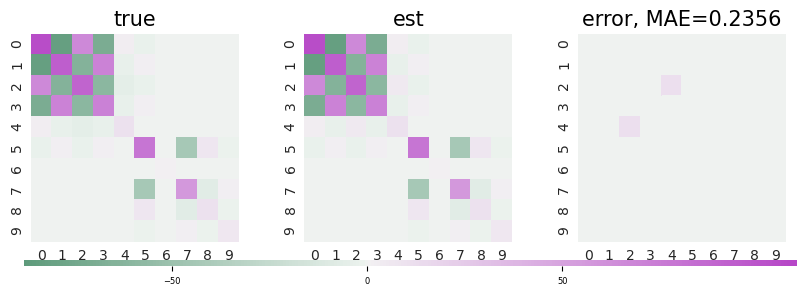

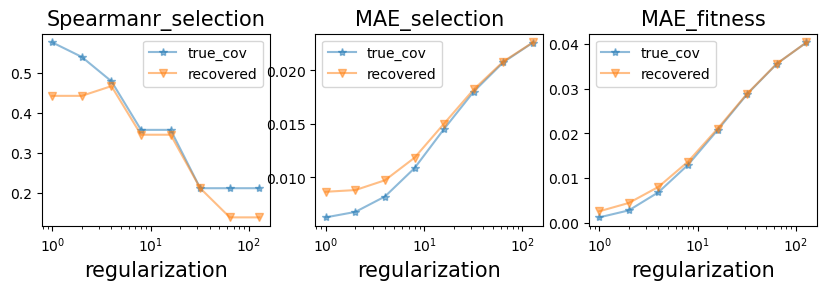

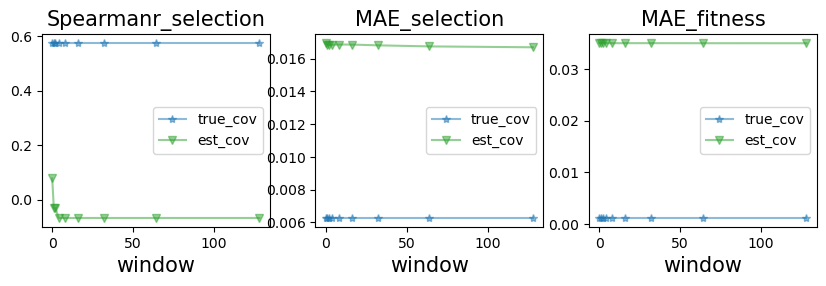

Plotting recovered results using regularization of 1, window of 128


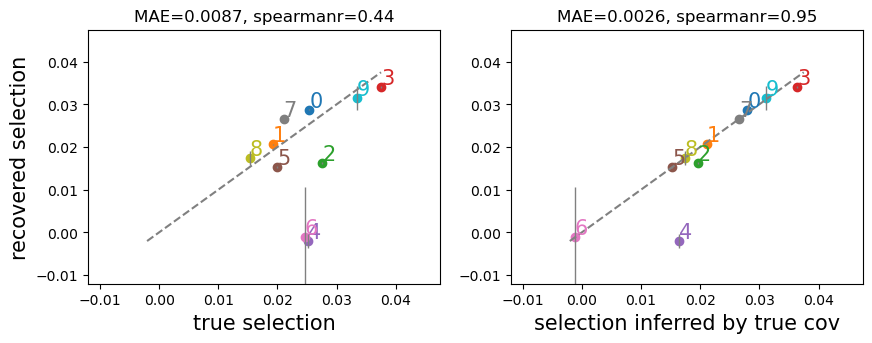

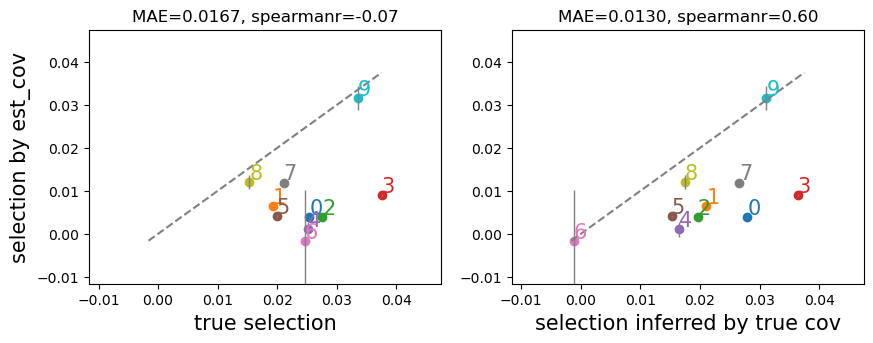

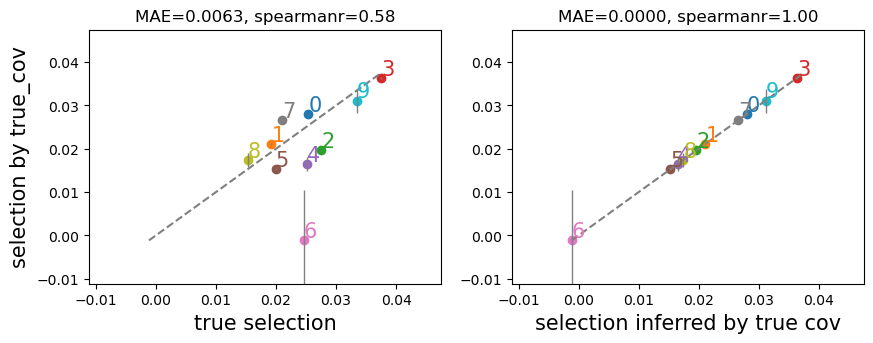

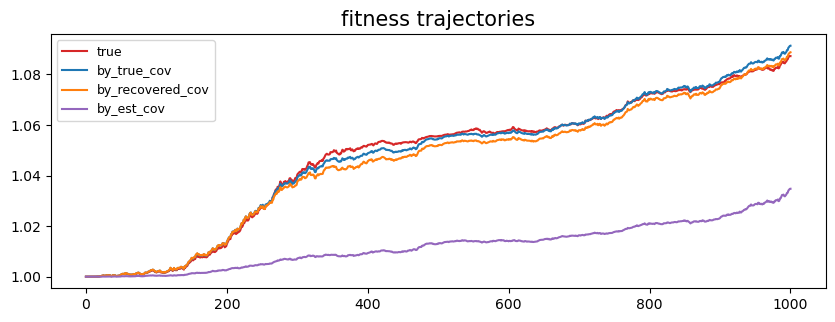

Plotting recovered results using regularization of 1, window of 128


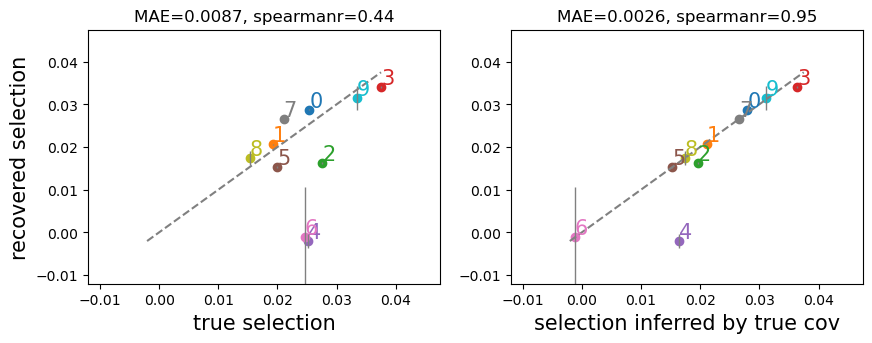

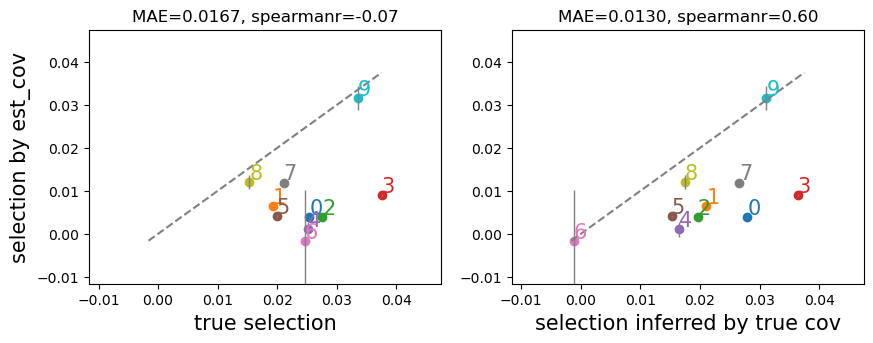

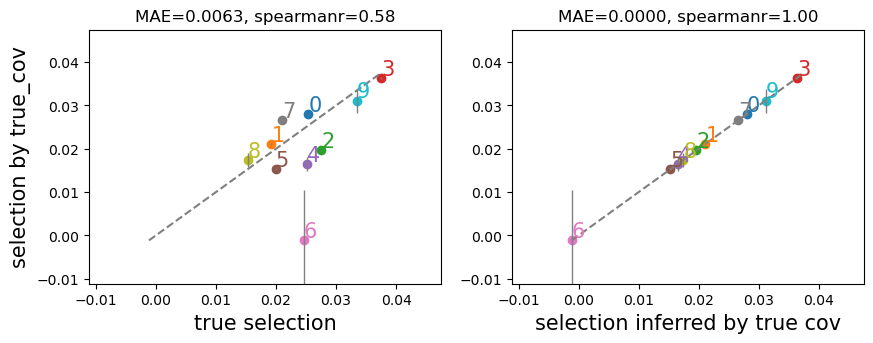

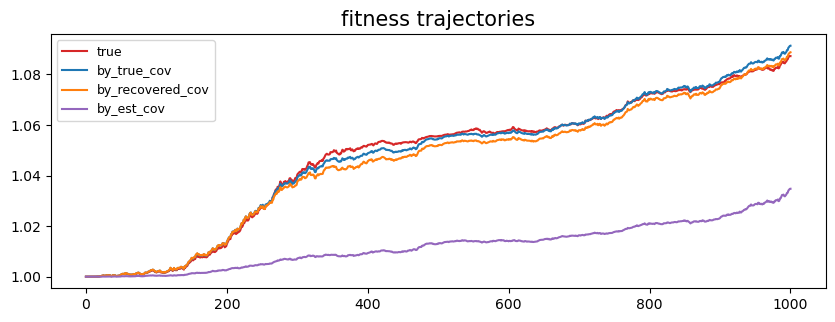

CPU times: user 14 s, sys: 638 ms, total: 14.6 s
Wall time: 14.8 s


In [10]:
%%time
reload()
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation, plot=True)

In [11]:
list(simulation.keys())

['mu',
 'nVec',
 'sVec',
 'times',
 'traj',
 'D',
 'selections',
 'cov',
 'covAtEachTime']

In [13]:
traj, times = simulation['traj'], simulation['times']

# Add sequential dummy members to each clade

In [41]:
def get_dummy_traj(freqs_background, mu=2e-4):
    t_emerge = np.min([t for t, freq in enumerate(freqs_background) if freq >= 0.01])
    t_end = len(freqs_background)
    t_dummy_emerge = np.random.uniform(0, t_end)
    freqs_dummy = [0] * t_emerge
    for t in range(t_emerge, t_end):
        freqs_dummy.append(freqs_dummy[-1] + mu * (1 - 2 * freqs_dummy[-1]))
    return freqs_dummy * freqs_background

def get_sweep_traj(freqs_background, mu=2e-4, s=0.01):
    t_end = len(freqs_background)
    t_emerge = np.min([t_end] + [t for t, freq in enumerate(freqs_background) if freq >= 0.01])
    t_dummy_emerge = np.random.uniform(0, t_end)
    freqs_dummy = [0] * t_emerge
    for t in range(t_emerge, t_end):
        x = freqs_dummy[-1]
        freqs_dummy.append(x + mu * (1 - 2 * freqs_dummy[-1]) + x * (1 - x) * s)
    return freqs_dummy * freqs_background

In [21]:
print(len(traj))
print(len(get_dummy_traj(traj[:, 0])))

1001
1001


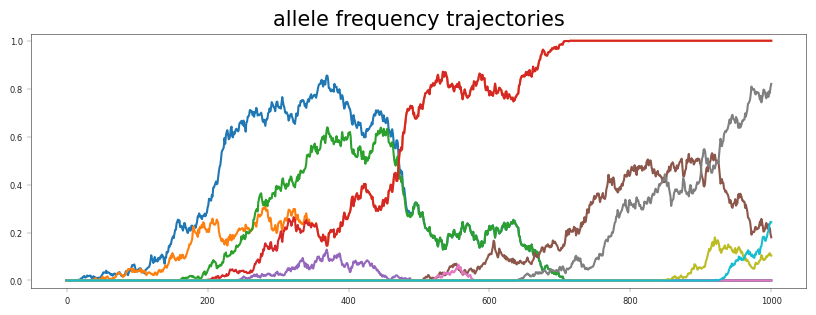

In [23]:
AP.plotTraj(traj, times=times)

In [24]:
dummy_traj = []
for l in range(len(traj[0])):
    dummy_traj.append(get_dummy_traj(traj[:, l]))
dummy_traj = np.array(dummy_traj).T

In [25]:
traj_populated = np.concatenate((traj, dummy_traj), axis=1)
print(traj_populated.shape)

(1001, 20)


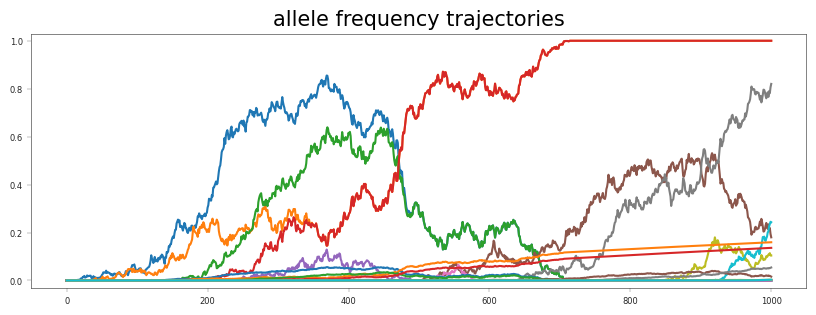

In [26]:
AP.plotTraj(traj_populated, times=times)

In [29]:
dummy_traj = []
for l in range(len(traj[0])):
    dummy_traj.append(get_sweep_traj(traj[:, l]))
dummy_traj = np.array(dummy_traj).T

In [30]:
traj_populated = np.concatenate((traj, dummy_traj), axis=1)
print(traj_populated.shape)

(1001, 20)


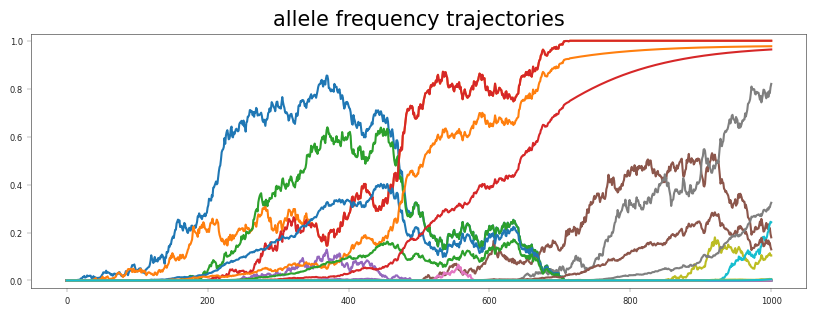

In [31]:
AP.plotTraj(traj_populated, times=times)

In [50]:
dummy_traj = []
num_rounds = 1
L = len(traj[0])
for l in range(L):
    dummy_traj.append(get_sweep_traj(traj[:, l], s=0.03))

for r in range(num_rounds):
    for l in range(L):
        traj_tmp = dummy_traj[r * L + l]
        dummy_traj.append(get_sweep_traj(traj_tmp, s=0.03))

dummy_traj = np.array(dummy_traj).T

In [51]:
traj_populated = np.concatenate((traj, dummy_traj), axis=1)
print(traj_populated.shape)

(1001, 30)


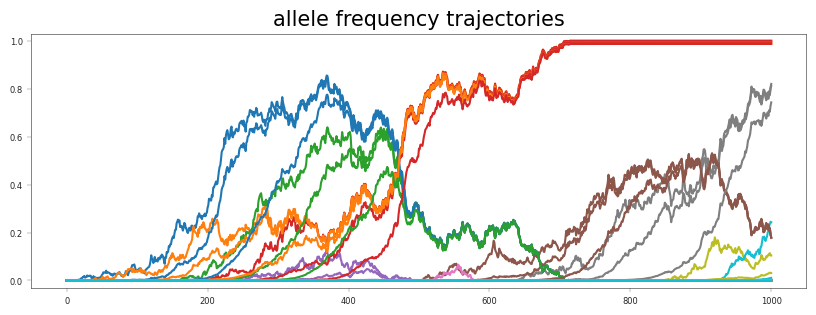

In [52]:
AP.plotTraj(traj_populated, times=times)

cladeFixedTimes = [705]
period boundaries:  [(0, 706), (705, 1001)]
ancestors:  [0, 1, 3]
refined period boundaries:  [(0, 508), (508, 1001)]


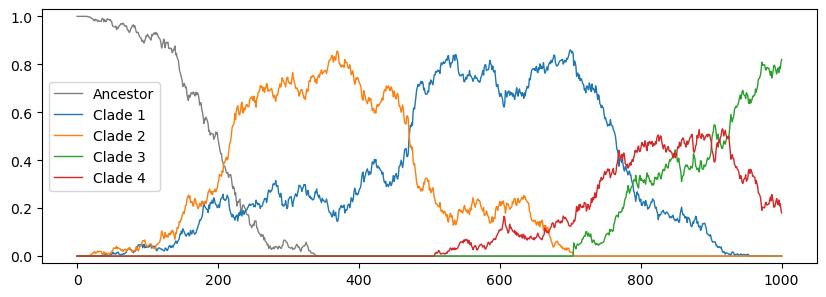

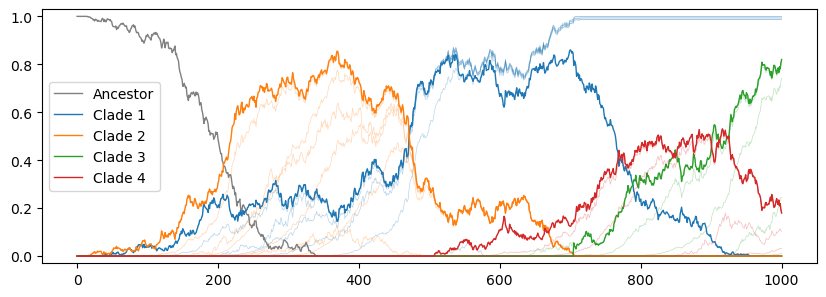

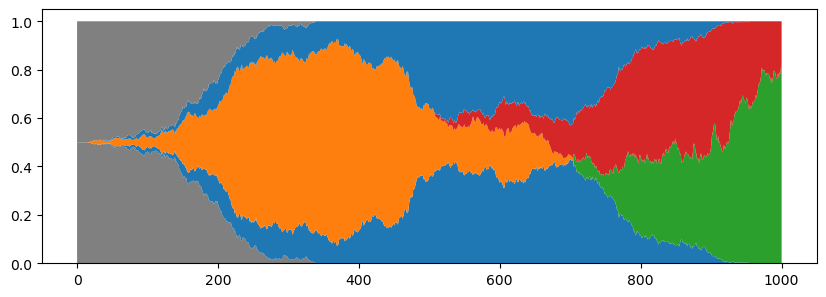

In [53]:
reload()
reconstruction = SH.get_reconstruction_from_traj(traj_populated, plot=True)

/Users/yunxiao/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:2780: RuntimeWarning: invalid value encountered in double_scalars
  ddx, ddy = dx / dd2, dy / dd2


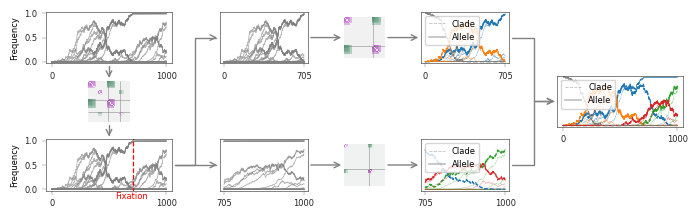

In [54]:
reload()
FIG.plot_figure_method_overview(reconstruction, plot_style=2, plot_arrow_from_traj_center=True,
    save_file=f'./test_figures/fig-overview-style2-manual.pdf')

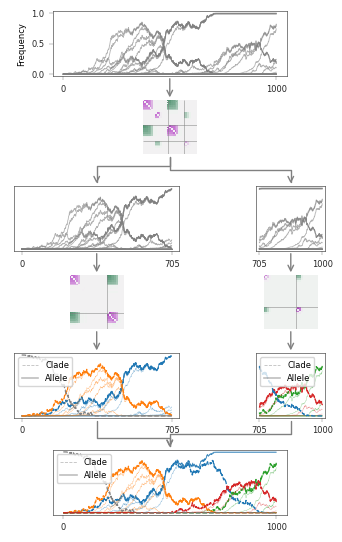

In [55]:
reload()
FIG.plot_figure_method_overview(reconstruction, plot_style=2, plot_single_column=True,
    save_file=f'./test_figures/fig-overview-style2-single-manual.pdf')